In [2569]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
from scipy.signal import fftconvolve

plt.rcParams['figure.figsize']=(20, 15)
# 全局设置输出图片大小 1280 x 720 像素

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

In [2570]:
def signal_sample(csignal, T, N):
    sample_signal = np.zeros(N,dtype='f')
    for n in range(N):
        sample_signal[n] = csignal(n*T)
    return sample_signal

In [2571]:
def sgl_exp_sin(t):
    return A*np.exp(-alpha*t)*np.sin(omega0*t)

In [2572]:
def dtft(xn):
    N = len(xn)
    n = np.arange(N)
    
    def X(w):
        len_out = len(w)
        result = np.zeros(len_out,dtype='complex')
        for i in range(len_out):
            e_w = np.exp(-1j*w[i]*n)
            result[i] = np.dot(xn,e_w)
        return result
    return X

In [2573]:
def dft(x):
    N = len(x)
    n = np.arange(N)  #  n in 0, 1, ..., N-1
    
    Xk = np.zeros(N,dtype='complex')
    for k in range(N):
        w = np.exp(-2j * np.pi * n * k /N)
        Xk[k] = np.dot(x,w)
    return Xk

In [2574]:
def draw_dft_abs(Xk, labeltext=''):
    plt.stem(np.abs(Xk), label=labeltext)

In [2575]:
def draw_dtft(Xw):
    x_scale = np.linspace(-2*np.pi,2*np.pi,10000)
    plt.plot(x_scale,np.abs(Xw(x_scale)))

In [2576]:
def draw_dtft(Xw, labeltext=''):
    x_scale = np.linspace(-2*np.pi,2*np.pi,10000)
    plt.plot(x_scale,np.abs(Xw(x_scale)) , label=labeltext)
    if labeltext != '':
        plt.legend()

In [2577]:
def dtft_analysis(xn):
    Xw = dtft(xn)
    draw_dtft(Xw)

In [2578]:
def dtft_analysis(xn,labeltext=''):
    Xw = fft(xn)
    draw_dft_abs(Xw,labeltext=labeltext)


In [2579]:
def draw_dsignal(xn):
    plt.stem(xn)

In [2580]:

def reverse(arr,start,end):
    while start<end:
        temp = arr[start]
        arr[start] = arr[end]
        arr[end] = temp
        start += 1
        end -= 1
 
def rightShift(arr,k):
    if arr == None:
        print("参数不合法！")
        return
    lens = len(arr)
    k %= lens
    reverse(arr,0,lens-k-1)
    reverse(arr,lens-k,lens-1)
    reverse(arr,0,lens-1)

a = [1,2,3]
rightShift(a,1)
print(a)

[3, 1, 2]


In [2581]:
def conv(x1,x2):
    x2 = x2.tolist()
    x1 = x1.tolist()
    x2_len = len(x2)
    for i in range(1,x2_len//2+1):
        x2[i],x2[x2_len-i] = x2[x2_len-i],x2[i]    
    out = np.zeros(x2_len)
    for i in range(x2_len):
        out[i] = np.dot(x1,x2)
        rightShift(x2,1)
    return np.array(out)

# 1.3.2   理想采样信号序列的特性分析
![image-20221015092451566](https://gitee.com/aweary/img/raw/master/img/image-20221015092451566.png)

In [2582]:
# 连续信号参数
A = 444.128
alpha = 50*np.pi*np.sqrt(2)
omega0 = 50*np.pi*np.sqrt(2)

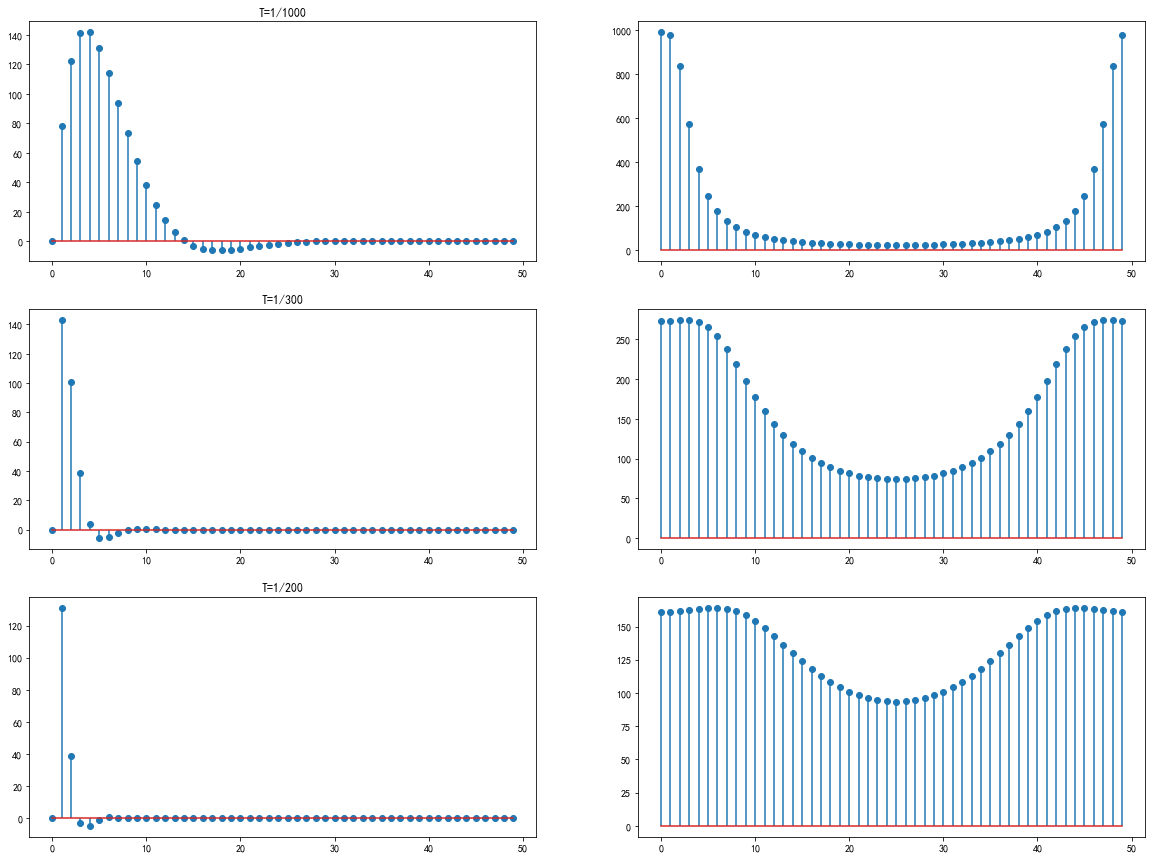

In [2583]:
# T = 1/1000 

plt.subplot(321)
plt.title("T=1/1000")
xa1 = signal_sample(sgl_exp_sin, 1/1000, 50)
draw_dsignal(xa1)
plt.subplot(322)
dtft_analysis(xa1)

# T = 1/300 
xa2 = signal_sample(sgl_exp_sin, 1/300, 50)
plt.subplot(323)
plt.title("T=1/300")

draw_dsignal(xa2)
plt.subplot(324)
dtft_analysis(xa2)

# T = 1/200
xa3 = signal_sample(sgl_exp_sin, 1/200, 50)
plt.subplot(325)
plt.title("T=1/200")

draw_dsignal(xa3)
plt.subplot(326)
dtft_analysis(xa3)


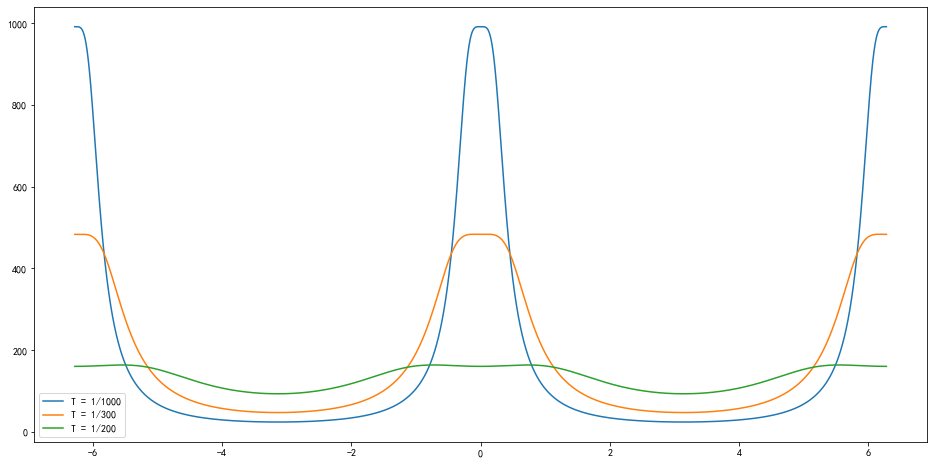

In [2584]:
plt.figure(figsize=(16, 8))
draw_dtft(Xw1,'T = 1/1000')
draw_dtft(Xw2,'T = 1/300')
draw_dtft(Xw3,'T = 1/200')

由上图可以看出，随着采样频率的下降，采样信号的各个频率分量之间的界限不在明显，出现频谱混叠现象。
因采样频率小于2倍信号最大频率

# 1.3.3   典型信号序列的特性分析
### 1.3.3.2 观察高斯序列的时域和频域特性
![image-20221015092400771](https://gitee.com/aweary/img/raw/master/img/image-20221015092400771.png)

In [2585]:
def gauss_sequence(N,p,q):
    n = np.arange(N)
    return np.exp(-((n-p)**2)/q)

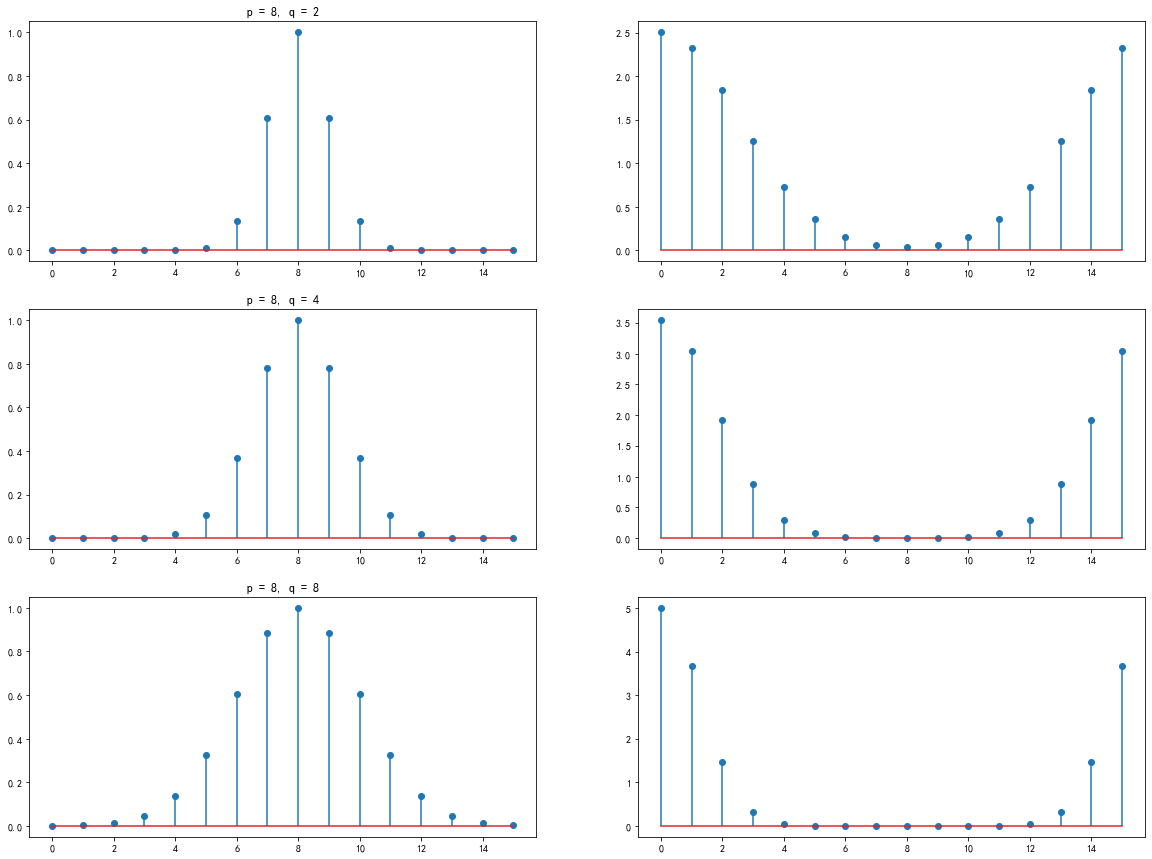

In [2586]:
plt.subplot(3,2,1)
plt.title("p = 8, q = 2")
xaa1 = gauss_sequence(16,8,2)
draw_dsignal(xaa1)
plt.subplot(3,2,2)
dtft_analysis(xaa1)

plt.subplot(3,2,3)
plt.title("p = 8, q = 4")
xaa2 = gauss_sequence(16,8,4)
draw_dsignal(xaa2)
plt.subplot(3,2,4)
dtft_analysis(xaa2)

plt.subplot(3,2,5)
plt.title("p = 8, q = 8")
xaa3 = gauss_sequence(16,8,8)
draw_dsignal(xaa3)
plt.subplot(3,2,6)
dtft_analysis(xaa3)

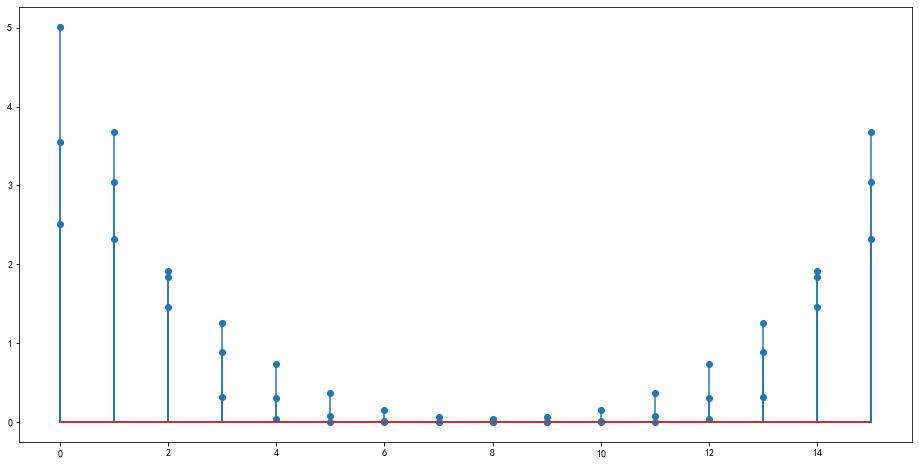

In [2587]:
plt.figure(figsize=(16,8))
dtft_analysis(xaa1,'q = 2')
dtft_analysis(xaa2,'q = 4')
dtft_analysis(xaa3,'q = 8')


当p保持不变，随着q增大，时域波形变宽且变得平滑，而频域波形变陡峭，频谱分量变少，不易发生混叠
高斯序列中q表示时域波形的陡峭程度

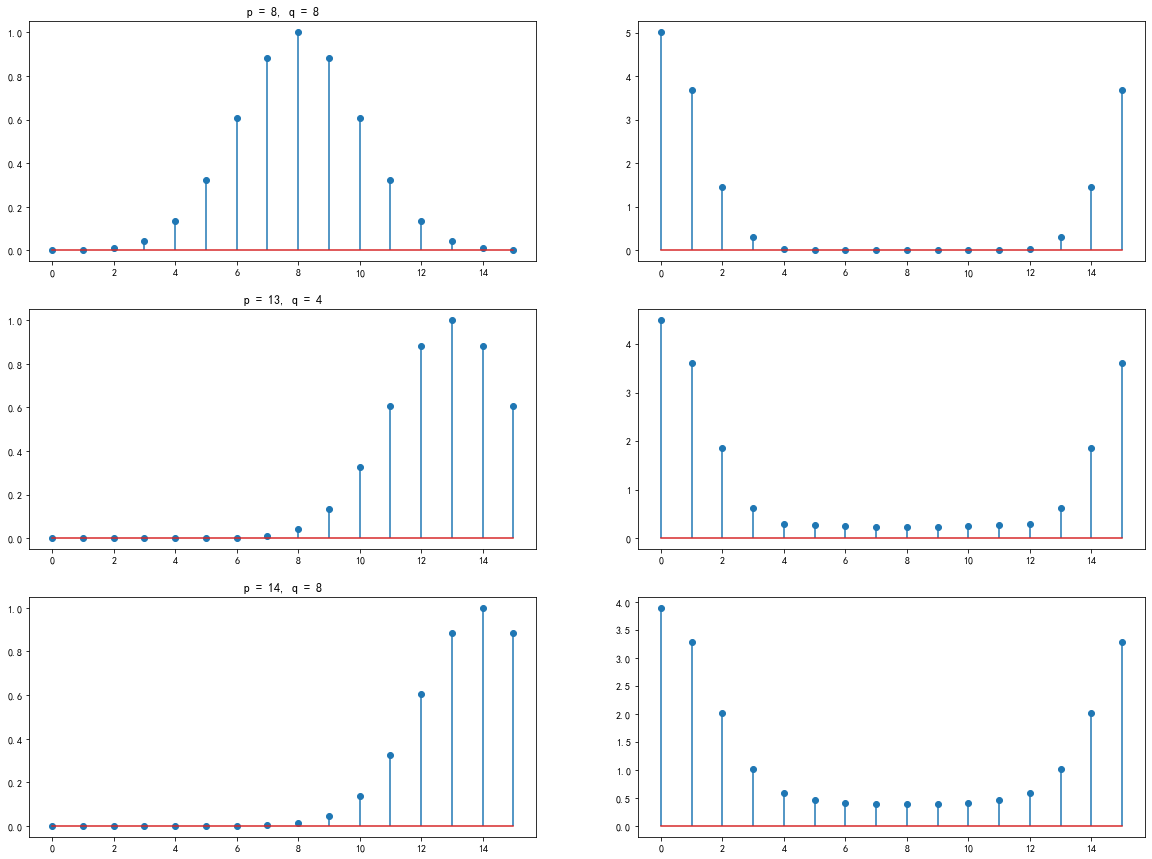

In [2588]:
plt.subplot(3,2,1)
plt.title("p = 8, q = 8")
xaa3 = gauss_sequence(16,8,8)
draw_dsignal(xaa3)
plt.subplot(3,2,2)
dtft_analysis(xaa3)

plt.subplot(3,2,3)
plt.title("p = 13, q = 4")
xaa4 = gauss_sequence(16,13,8)
draw_dsignal(xaa4)
plt.subplot(3,2,4)
dtft_analysis(xaa4)

plt.subplot(3,2,5)
plt.title("p = 14, q = 8")
xaa5 = gauss_sequence(16,14,8)
draw_dsignal(xaa5)
plt.subplot(3,2,6)
dtft_analysis(xaa5)

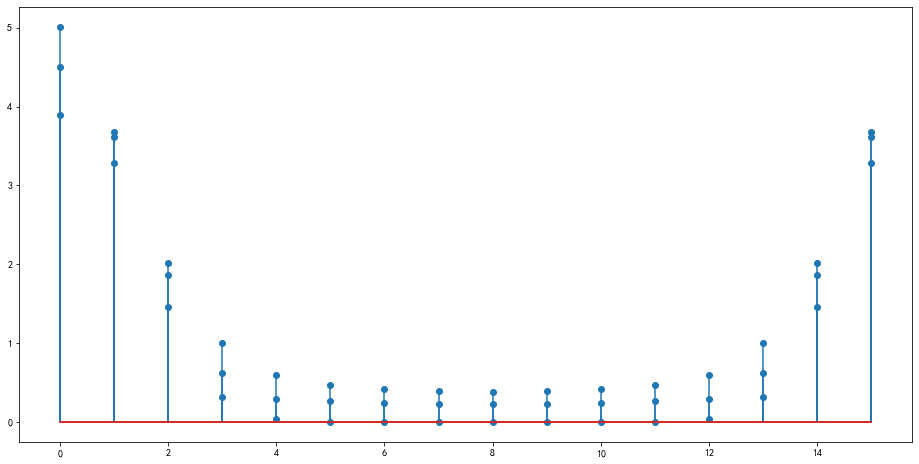

In [2589]:
plt.figure(figsize=(16,8))
dtft_analysis(xaa3,'p = 8')
dtft_analysis(xaa4,'p = 13')
dtft_analysis(xaa5,'p = 14')


当q保持不变，随着q增大时，时域波形的中心整体向右移，q表示时域波形峰值的位置。
p=13,p=14时由于时域窗口限制导致一部分时域分量丢失，频域波形随p的增大频率分量增多，容易产生混叠

### 1.3.3.3 观察衰减正弦序列的时域和幅频特性

![image-20221015093722741](https://gitee.com/aweary/img/raw/master/img/image-20221015093722741.png)

In [2590]:
def sin_decay_sequence(N,alpha,f):
    n = np.arange(N)
    return np.exp(-alpha*n)*np.sin(2*np.pi*f*n)

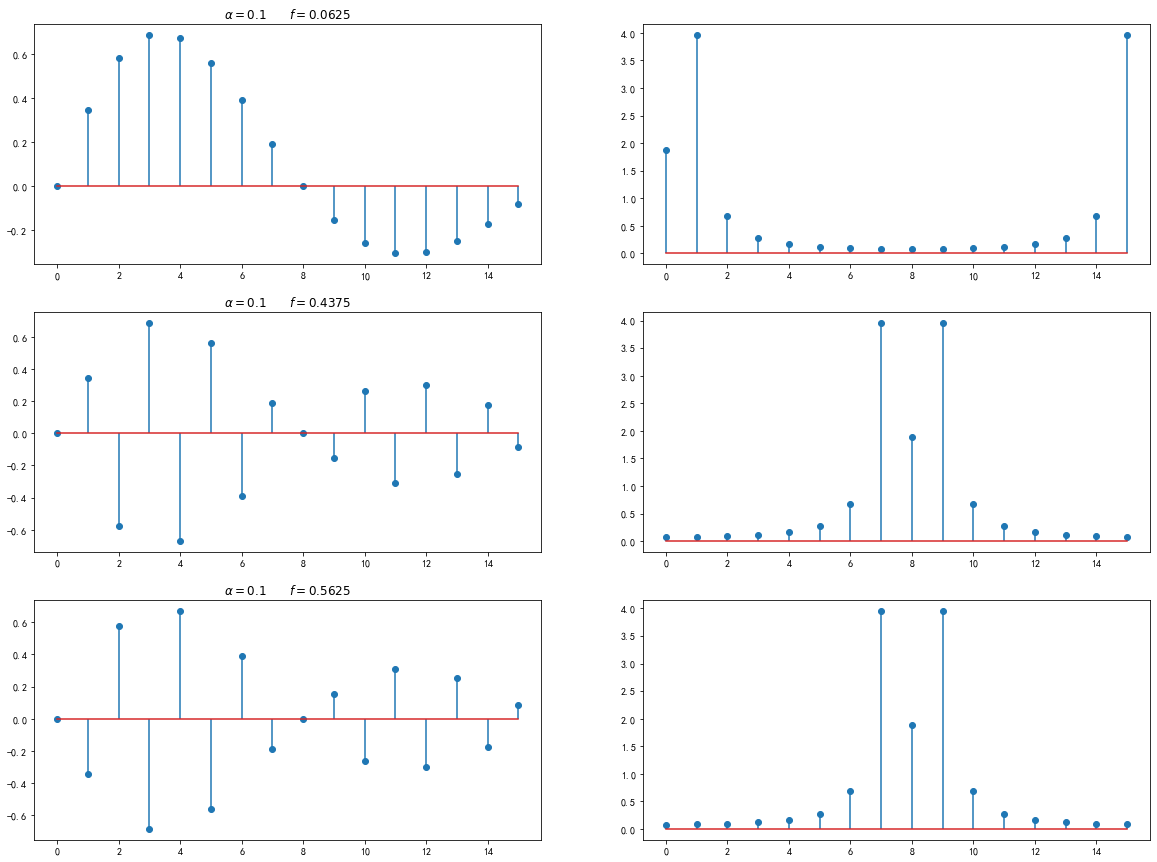

In [2591]:
plt.subplot(321)
plt.title("$\\alpha=0.1  \qquad   f = 0.0625$")

xbb = sin_decay_sequence(16,0.1,0.0625)
draw_dsignal(xbb)
plt.subplot(322)

dtft_analysis(xbb)

plt.subplot(323)
plt.title("$\\alpha=0.1   \qquad  f = 0.4375$")
xbb = sin_decay_sequence(16,0.1,0.4375)
draw_dsignal(xbb)
plt.subplot(324)

dtft_analysis(xbb)

plt.subplot(325)
plt.title("$\\alpha=0.1   \qquad  f = 0.5625$")
xbb = sin_decay_sequence(16,0.1,0.5625)
draw_dsignal(xbb)
plt.subplot(326)
dtft_analysis(xbb)

f相当于对以采样频率归一化后的信号频率，当$f<0.5$时满足奈奎斯特采样准则，频谱混叠较弱
当$f=0.5625$时不满足奈奎斯特采样准则，频谱混叠明显


### 1.3.3.4 观察三角波序列和反三角波序列的时域和幅频特性
![image-20221015094503327](https://gitee.com/aweary/img/raw/master/img/image-20221015094503327.png)

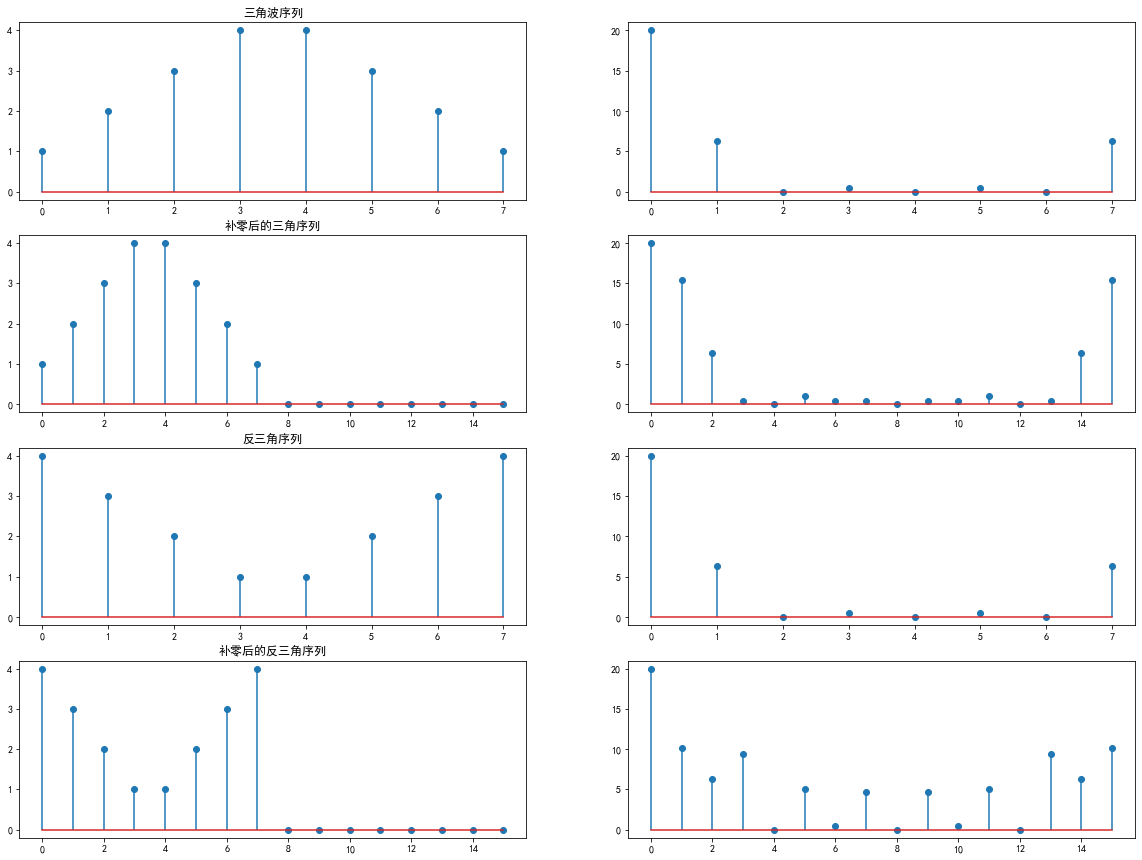

In [2592]:
plt.subplot(421)
plt.title("三角波序列")
xcc = np.array([1,2,3,4,4,3,2,1])
draw_dsignal(xcc)
plt.subplot(422)
draw_dft_abs(fft(xcc))

plt.subplot(423)
plt.title("补零后的三角序列")
xcc = np.concatenate((xcc,np.zeros(8)))
draw_dsignal(xcc)
plt.subplot(424)
draw_dft_abs(fft(xcc))

plt.subplot(425)
plt.title("反三角序列")
xdd = np.array([4,3,2,1,1,2,3,4])
draw_dsignal(xdd)
plt.subplot(426)
draw_dft_abs(fft(xdd))

plt.subplot(427)
plt.title("补零后的反三角序列")
xdd = np.concatenate((xdd,np.zeros(8)))
draw_dsignal(xdd)
plt.subplot(428)
draw_dft_abs(fft(xdd))

![image-20221015100603469](https://gitee.com/aweary/img/raw/master/img/image-20221015100603469.png)

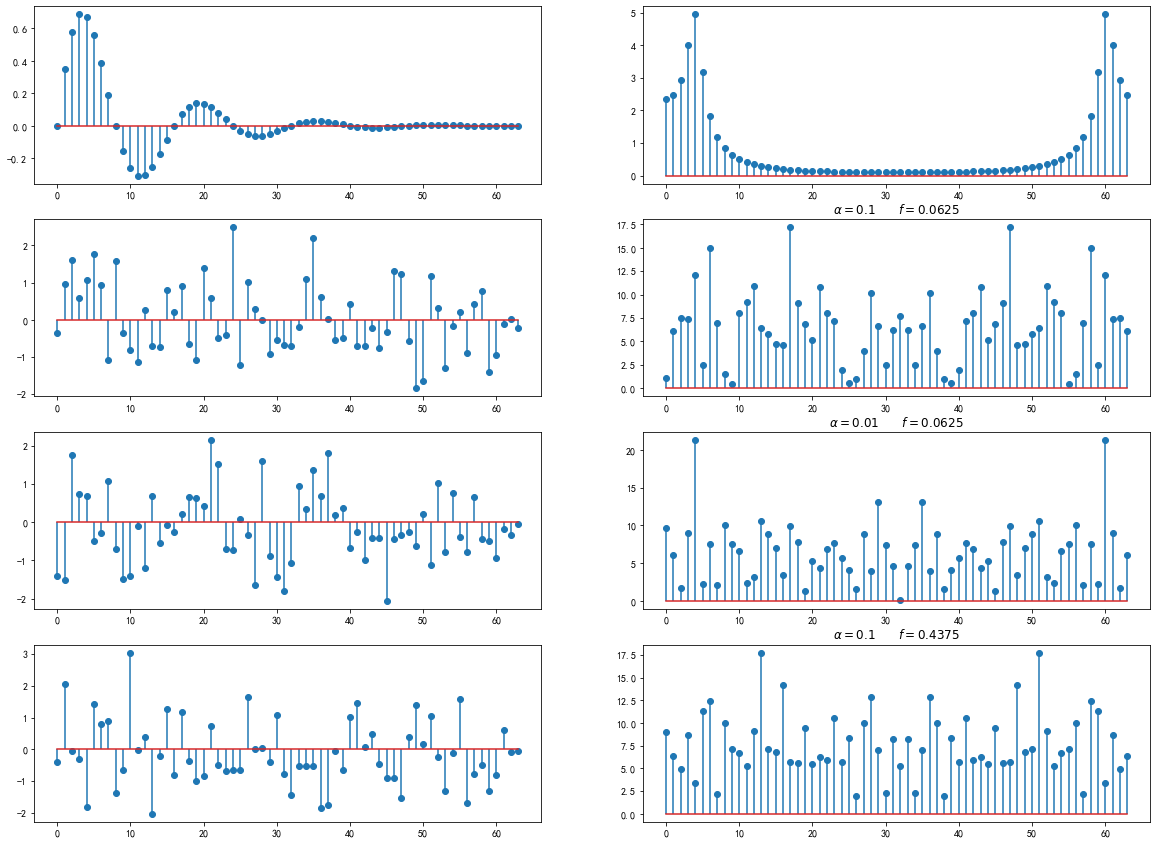

In [2593]:
xb = sin_decay_sequence(64,0.1,0.0625)

plt.subplot(421)
draw_dsignal(xb)
plt.subplot(422)
dtft_analysis(xb)

plt.subplot(423)
wn = np.random.randn(64)
yn = wn + xb
draw_dsignal(yn)
plt.subplot(424)
plt.title("$\\alpha=0.1 \qquad f=0.0625$")

dtft_analysis(yn)
# 改变alpha为0.01
xb = sin_decay_sequence(64,0.01,0.0625)

plt.subplot(425)
wn = np.random.randn(64)
yn = wn + xb
draw_dsignal(yn)
plt.subplot(426)
plt.title("$\\alpha=0.01 \qquad f=0.0625$")

dtft_analysis(yn)

# 改变f为0.4375
xb = sin_decay_sequence(64,0.1,0.4375)
plt.subplot(427)
wn = np.random.randn(64)
yn = wn + xb
draw_dsignal(yn)
plt.subplot(428)
plt.title("$\\alpha=0.1 \qquad f=0.4375$")

dtft_analysis(yn)

# 1.3.4   离散信号、系统和系统响应的分析
![image-20221015101522956](https://gitee.com/aweary/img/raw/master/img/image-20221015101522956.png)

In [2594]:
sum = 0
for i in range(1,8):
    for j in range(1,16):
        sum += np.sqrt((i-4)**2+(j-7)**2)
print()

In [2595]:
xb = [1]

![image-20221015101607388](https://gitee.com/aweary/img/raw/master/img/image-20221015101607388.png)

In [2596]:
xc = np.ones(10)

![image-20221015101644819](https://gitee.com/aweary/img/raw/master/img/image-20221015101644819.png)

In [2597]:
ha = xc
# draw_dsignal(ha)

In [2598]:
hb = np.array([1,2.5,2.5,1])
# draw_dsignal(hb)

## 1.3.4.2 离散信号、系统和系统响应的分析
![image-20221111232600882](https://gitee.com/aweary/img/raw/master/img/202211112326957.png)

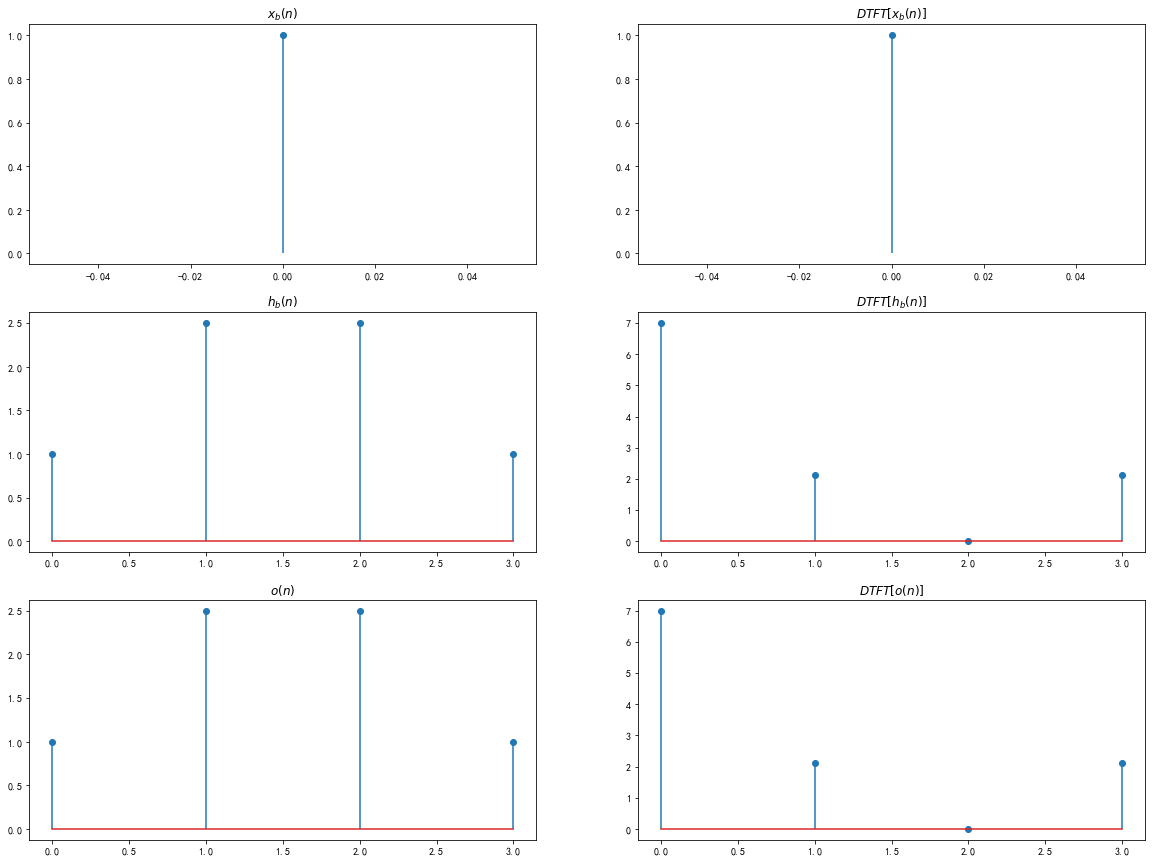

In [2599]:
plt.subplot(3,2,1)
plt.title("$x_b(n)$")
draw_dsignal(xb)
plt.subplot(3,2,2)
plt.title("$DTFT[x_b(n)]$")
dtft_analysis(xb)
plt.subplot(3,2,3)
plt.title("$h_b(n)$")
draw_dsignal(hb)
plt.subplot(3,2,4)
plt.title("$DTFT[h_b(n)]$")
dtft_analysis(hb)

# 输出信号为o(n)
out = np.convolve(xb,hb)
plt.subplot(3,2,5)
plt.title("$o(n)$")
draw_dsignal(out)
plt.subplot(3,2,6)
plt.title("$DTFT[o(n)]$")
dtft_analysis(out)

单位冲击函数的频域为常数1
单位冲击函数通过单位冲击响应为$h_b(n)$的系统时，输出即为 $h_b(n)$

![image-20221111232645351](https://gitee.com/aweary/img/raw/master/img/202211112326384.png)

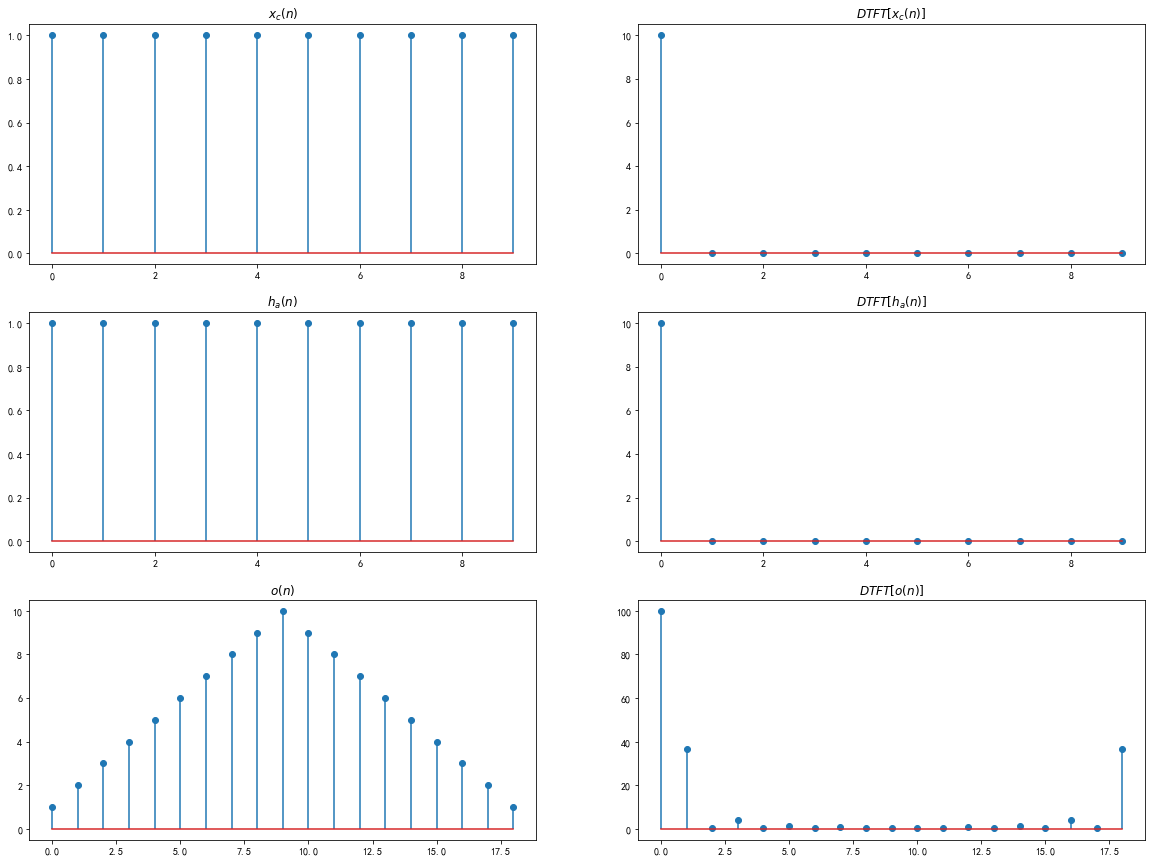

In [2600]:
plt.subplot(3,2,1)
plt.title("$x_c(n)$")
draw_dsignal(xc)
plt.subplot(3,2,2)
plt.title("$DTFT[x_c(n)]$")
dtft_analysis(xc)
plt.subplot(3,2,3)
plt.title("$h_a(n)$")
draw_dsignal(ha)
plt.subplot(3,2,4)
plt.title("$DTFT[h_a(n)]$")
dtft_analysis(ha)

# 输出信号为o(n)
out = np.convolve(xc,ha)
plt.subplot(3,2,5)
plt.title("$o(n)$")
draw_dsignal(out)
plt.subplot(3,2,6)
plt.title("$DTFT[o(n)]$")
dtft_analysis(out)

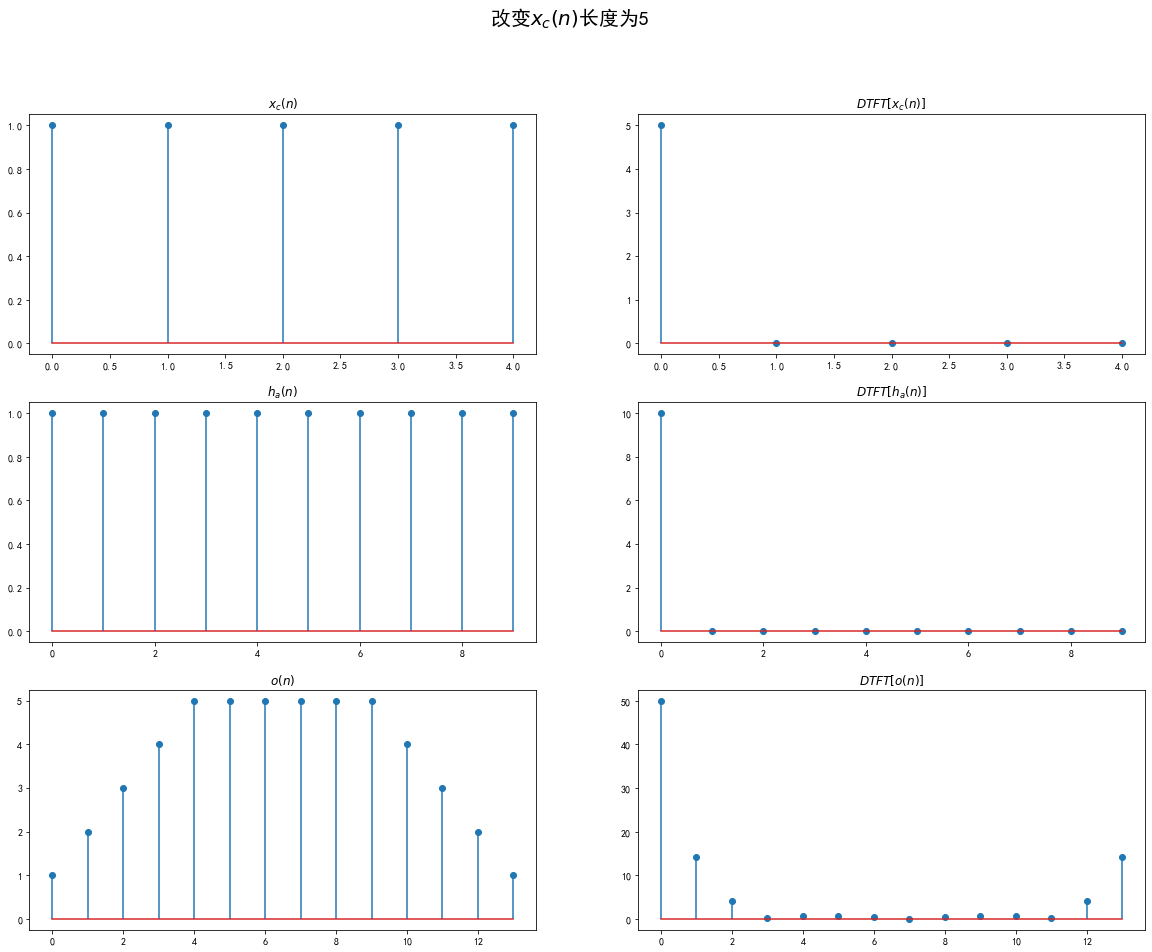

In [2601]:
xc = np.array([1,1,1,1,1])
plt.suptitle('改变$x_c(n)$长度为5',fontsize = 20)

plt.subplot(3,2,1)
plt.title("$x_c(n)$")
draw_dsignal(xc)
plt.subplot(3,2,2)
plt.title("$DTFT[x_c(n)]$")
dtft_analysis(xc)
plt.subplot(3,2,3)
plt.title("$h_a(n)$")
draw_dsignal(ha)
plt.subplot(3,2,4)
plt.title("$DTFT[h_a(n)]$")
dtft_analysis(ha)

# 输出信号为o(n)
out = np.convolve(xc,ha)
plt.subplot(3,2,5)
plt.title("$o(n)$")
draw_dsignal(out)
plt.subplot(3,2,6)
plt.title("$DTFT[o(n)]$")
dtft_analysis(out)

![image-20221111232720000](https://gitee.com/aweary/img/raw/master/img/202211112327042.png)

10 50
50


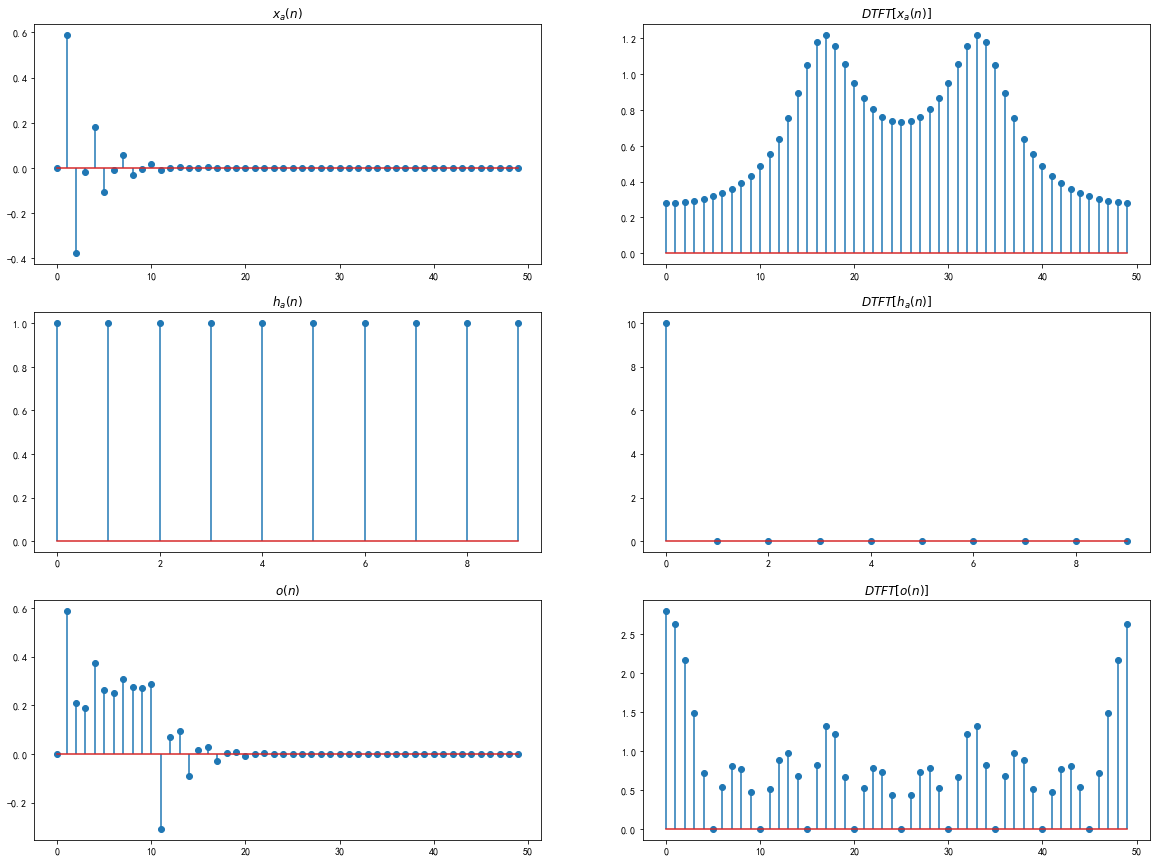

In [2602]:
# 连续信号参数
A = 1
alpha = 0.4
omega0 = 2.0734

xa = signal_sample(sgl_exp_sin, 1, 50)


plt.subplot(3,2,1)
plt.title("$x_a(n)$")
draw_dsignal(xa)
plt.subplot(3,2,2)
plt.title("$DTFT[x_a(n)]$")
dtft_analysis(xa)
plt.subplot(3,2,3)
plt.title("$h_a(n)$")
draw_dsignal(ha)
plt.subplot(3,2,4)
plt.title("$DTFT[h_a(n)]$")
dtft_analysis(ha)

# 输出信号为o(n)
print(len(ha),len(xa))
ha = np.concatenate((ha,np.zeros(40)))
print(len(ha))
# np.dot(ha,xa)
out = conv(xa,ha)
plt.subplot(3,2,5)
plt.title("$o(n)$")
draw_dsignal(out)
plt.subplot(3,2,6)
plt.title("$DTFT[o(n)]$")
dtft_analysis(out)

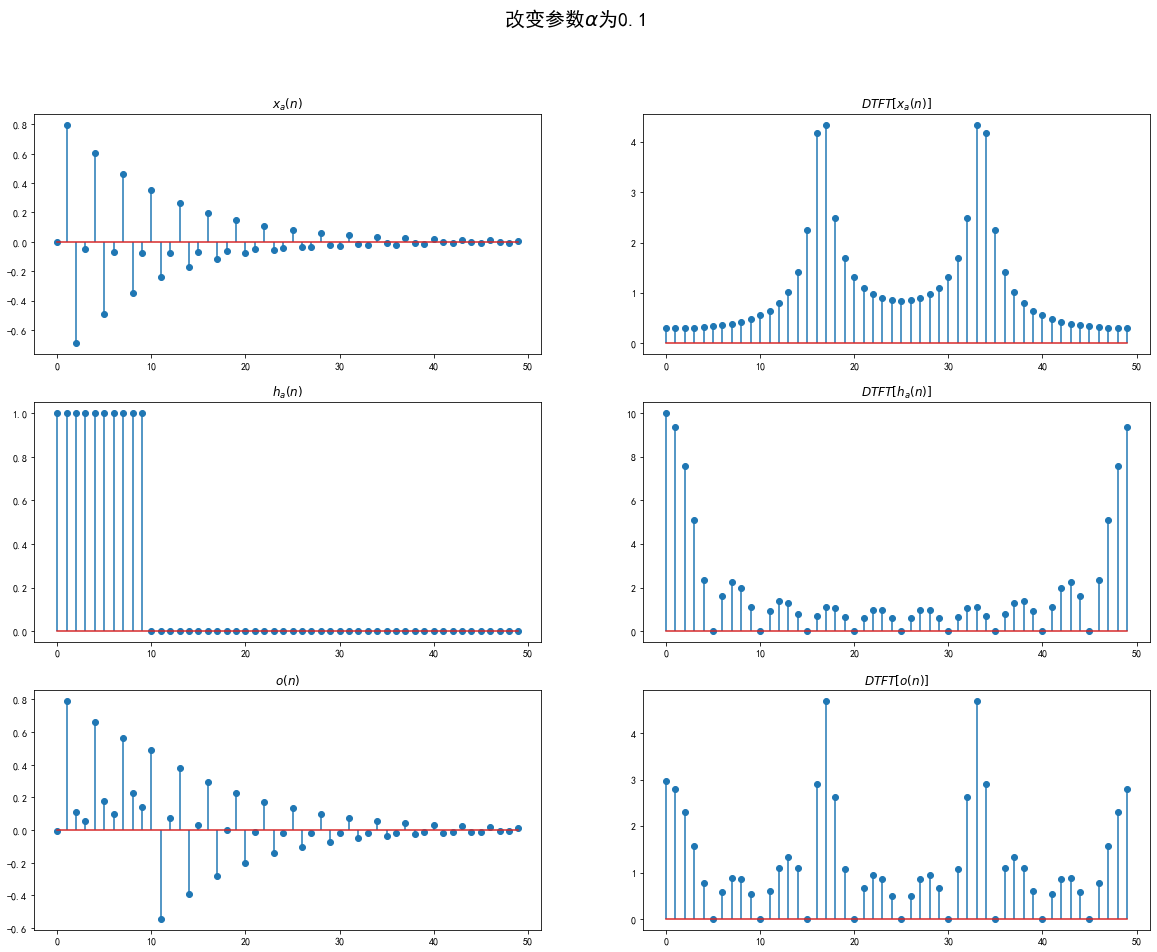

In [2603]:
# 连续信号参数
A = 1
alpha = 0.1
omega0 = 2.0734

xa = signal_sample(sgl_exp_sin, 1, 50)

plt.suptitle("改变参数$\\alpha$为0.1",fontsize = 20)

plt.subplot(3,2,1)
plt.title("$x_a(n)$")
draw_dsignal(xa)
plt.subplot(3,2,2)
plt.title("$DTFT[x_a(n)]$")
dtft_analysis(xa)
plt.subplot(3,2,3)
plt.title("$h_a(n)$")
draw_dsignal(ha)
plt.subplot(3,2,4)
plt.title("$DTFT[h_a(n)]$")
dtft_analysis(ha)

# 输出信号为o(n)
out = conv(xa,ha)
plt.subplot(3,2,5)
plt.title("$o(n)$")
draw_dsignal(out)
plt.subplot(3,2,6)
plt.title("$DTFT[o(n)]$")
dtft_analysis(out)

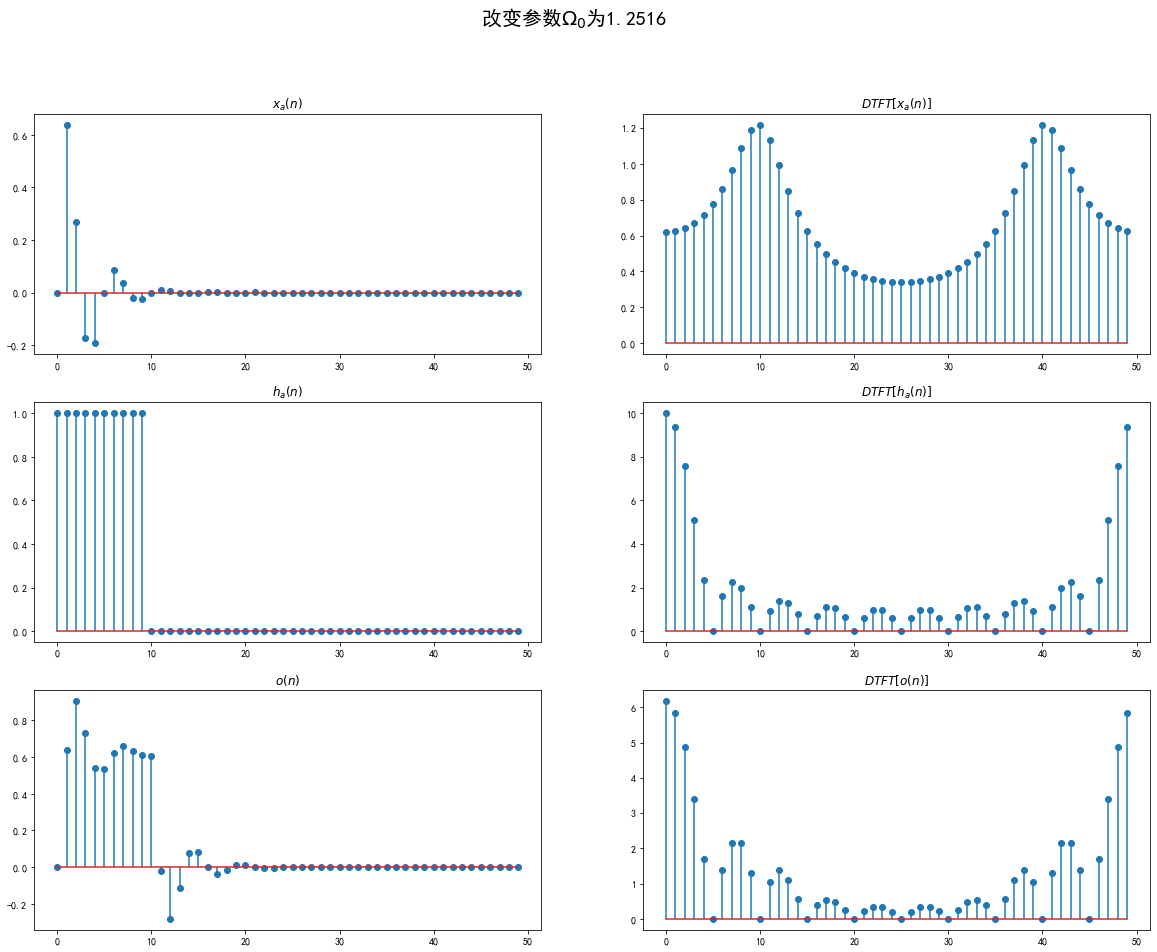

In [2604]:
# 连续信号参数
A = 1
alpha = 0.4
omega0 = 1.2516

xa = signal_sample(sgl_exp_sin, 1, 50)

plt.suptitle("改变参数$\Omega_0$为1.2516",fontsize = 20)

plt.subplot(3,2,1)
plt.title("$x_a(n)$")
draw_dsignal(xa)
plt.subplot(3,2,2)
plt.title("$DTFT[x_a(n)]$")
dtft_analysis(xa)
plt.subplot(3,2,3)
plt.title("$h_a(n)$")
draw_dsignal(ha)
plt.subplot(3,2,4)
plt.title("$DTFT[h_a(n)]$")
dtft_analysis(ha)

# 输出信号为o(n)
out = conv(xa,ha)
plt.subplot(3,2,5)
plt.title("$o(n)$")
draw_dsignal(out)
plt.subplot(3,2,6)
plt.title("$DTFT[o(n)]$")
dtft_analysis(out)

## 1.3.4.3 卷积定律的验证
![image-20221111232808945](https://gitee.com/aweary/img/raw/master/img/202211112328980.png)

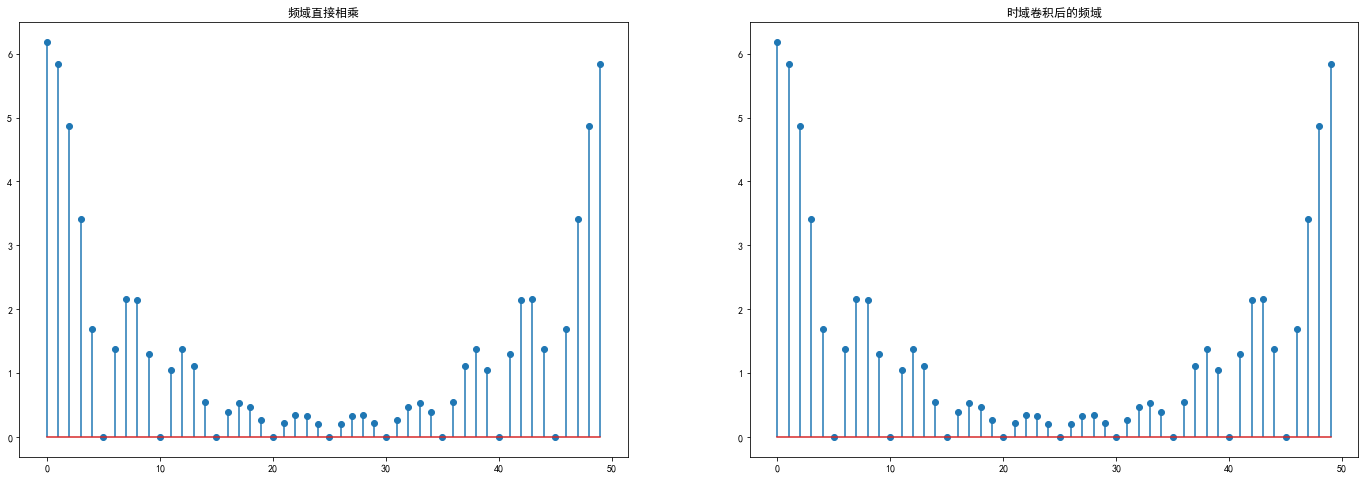

In [2605]:
# def out_1(x):
#      return dtft(xa)(x) * dtft(ha)(x)

out_1 = fft(xa)*fft(ha)
plt.figure(figsize=(24, 8))
plt.subplot(121)
plt.title("频域直接相乘")
draw_dft_abs(out_1) 
plt.subplot(122)
plt.title("时域卷积后的频域")
dtft_analysis(out)

## 1.3.5   *选作内容
![image-20221111232851815](https://gitee.com/aweary/img/raw/master/img/202211112328851.png)
![image-20221111232910988](https://gitee.com/aweary/img/raw/master/img/202211112329017.png)